In [3]:
# Install required packages
install.packages(c("ggplot2", "sf", "ggspatial", "osmdata", "ggrepel"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘jpeg’, ‘png’, ‘proj4’, ‘crsmeta’, ‘PROJ’, ‘classInt’, ‘s2’, ‘units’, ‘rosm’, ‘abind’, ‘reproj’




In [4]:
# Load libraries
library(ggplot2)
library(sf)
library(ggspatial)
library(osmdata)
library(ggrepel)

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

Data (c) OpenStreetMap contributors, ODbL 1.0. https://www.openstreetmap.org/copyright



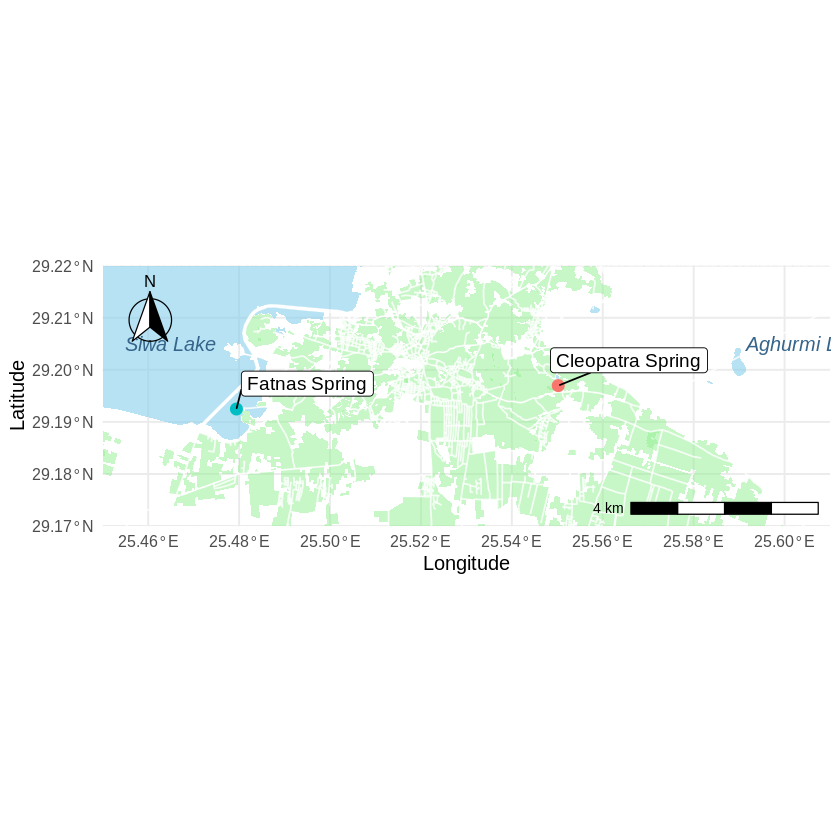

In [10]:
# Coordinates for Cleopatra and Fatnas Springs
locations <- data.frame(
  name = c("Cleopatra Spring", "Fatnas Spring"),
  lon = c(25.5502083, 25.4794167),
  lat = c(29.1969667, 29.1924722)
)

# Convert to spatial data frame
locations_sf <- st_as_sf(locations, coords = c("lon", "lat"), crs = 4326)

# Expand bounding box to include Siwa and Aghurmi Lakes
bbox <- c(xmin = 25.45, xmax = 25.61, ymin = 29.17, ymax = 29.22)

water_osm <- opq(bbox = bbox, timeout = 60) %>%
  add_osm_feature(key = "natural", value = "water") %>%
  osmdata_sf()

# Get landuse for light green areas
land_osm <- opq(bbox = bbox) %>%
  add_osm_feature(key = "landuse") %>%
  osmdata_sf()

# Get roads as grey outlines
roads_osm <- opq(bbox = bbox) %>%
  add_osm_feature(key = "highway") %>%
  osmdata_sf()

# Plot
ggplot() +
  # Base landuse
  geom_sf(data = land_osm$osm_polygons, fill = "lightgreen", color = NA, alpha = 0.5) +

  # Water bodies
  geom_sf(data = water_osm$osm_polygons, fill = "skyblue", color = NA, alpha = 0.6) +

  # Roads (thin white lines)
  geom_sf(data = roads_osm$osm_lines, color = "white", size = 0.2, alpha = 0.8) +

  # Points for springs
  geom_sf(data = locations_sf, aes(color = name), size = 3) +

  # Labels
  geom_label_repel(data = locations, aes(x = lon, y = lat, label = name),
                   size = 4, min.segment.length = 0, box.padding = 0.5) +


  # Lake labels (manually added)
  annotate("text", x = 25.465, y = 29.205, label = "Siwa Lake",
           size = 4.2, fontface = "italic", color = "steelblue4") +
  annotate("text", x = 25.605, y = 29.205, label = "Aghurmi Lake",
           size = 4.2, fontface = "italic", color = "steelblue4") +

  # Set map extent and layout
  coord_sf(xlim = c(bbox["xmin"], bbox["xmax"]),
           ylim = c(bbox["ymin"], bbox["ymax"]), expand = FALSE) +
  annotation_scale(location = "br", width_hint = 0.3) +
  annotation_north_arrow(location = "tl", which_north = "true",
                         style = north_arrow_fancy_orienteering) +
  theme_minimal(base_size = 12) +
  labs(x = "Longitude", y = "Latitude") +
  theme(legend.position = "none")